# Multiple Point Cloud

In [1]:
### RAI Version I use : 0.1.1 
import robotic as ry
import numpy as np
import matplotlib.pyplot as plt
print(ry.__version__, ry.compiled())

0.1.1 compile time: Nov  3 2023 11:48:10


In [2]:
C = ry.Config()
C.addFile('../rai-robotModels/scenarios/pandaSingle_crates.g')                  #Directory of : pandaSingle_crates.g
C.view(False, 'this is your workspace data structure C -- NOT THE SIMULATION')

0

In [3]:
cam = ry.CameraView(C)
cam.setCamera('camera_1')
rgb, depth = cam.computeImageAndDepth(C)
pcl = ry.depthImage2PointCloud(depth, cam.getFxycxy())

In [4]:
print(rgb.shape, depth.shape, pcl.shape)
print(C.view_fxycxy())

(360, 640, 3) (360, 640) (360, 640, 3)
[1881.85195923 1881.85195923  200.          200.        ]


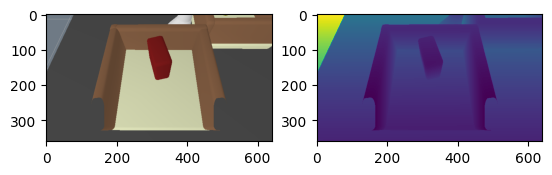

In [5]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(rgb)
fig.add_subplot(1,2,2)
plt.imshow(depth)
plt.show()

In [6]:
C.delFrame('pcl2')
p1 = C.addFrame('pcl2', 'camera_1')
p1.setPointCloud(pcl, [0,0,255])
C.view()

-- WARNING:kin.cpp:getFrame:393(-1) cannot find frame named 'pcl2'


0

In [7]:
print(p1.getPosition())
print((p1.getMeshPoints()).shape)
print((p1.getMeshPoints())[0])

[ 0.8 -0.4  1.4]
(230400, 3)
[-2.07261729 -1.16584718  2.08686638]


### Use Camera-2

(360, 640, 3) (360, 640) (360, 640, 3)
[1881.85195923 1881.85195923  200.          200.        ]


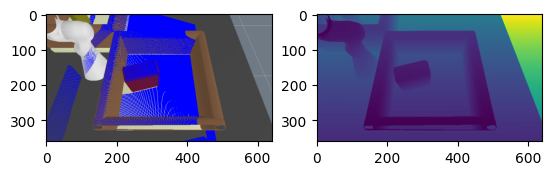

In [8]:
cam = ry.CameraView(C)
cam.setCamera('camera_2')
rgb, depth = cam.computeImageAndDepth(C)
pcl = ry.depthImage2PointCloud(depth, cam.getFxycxy())   #since it is calling function, it is okay to just name: pcl
print(rgb.shape, depth.shape, pcl.shape)
print(C.view_fxycxy())
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(rgb)
fig.add_subplot(1,2,2)
plt.imshow(depth)
plt.show()

In [9]:
C.delFrame('pcl3')
p2 = C.addFrame('pcl3', 'camera_2')
p2.setPointCloud(pcl, [0,255,0])
C.view()

-- WARNING:kin.cpp:getFrame:393(-1) cannot find frame named 'pcl3'


0

In [10]:
print(p2.getPosition())
print((p2.getMeshPoints()).shape)
print((p2.getMeshPoints())[0])

[ 0.5  -0.7   1.45]
(230400, 3)
[-0.84245485 -0.4738808   0.84824663]


### Point Cloud Merging (This Part is Not Complete. Yet.)

In [12]:
print(((p1.getMeshPoints())+(p2.getMeshPoints())).shape)
pc1=p1.getMeshPoints()
pc2=p2.getMeshPoints()
concat=np.concatenate((p1.getMeshPoints())+(p2.getMeshPoints()))
print(concat)
#print(np.shape(concat))

(230400, 3)
[-2.91507214 -1.63972798  2.93511301 ...  1.34588498  0.75521445
  1.35938597]


In [22]:
from scipy.spatial import cKDTree
from scipy.optimize import minimize
import numpy as np
# Set a tolerance for point comparison
tolerance = 1e-6

# Function to minimize (sum of squared distances)
def objective_function(params, pc1, pc2):
    rotated_pc1 = np.dot(pc1, params[:9].reshape((3, 3)))
    translated_pc1 = rotated_pc1 + params[9:]
    distances, _ = cKDTree(pc2).query(translated_pc1)
    return np.sum(distances)

# Initial guess for parameters (rotation matrix and translation vector)
initial_params = np.zeros(12)

# Optimize the parameters using the ICP algorithm
result = minimize(objective_function, initial_params, args=(pc1, pc2), method='Powell')

# Apply the transformation to pc1
rotated_pc1 = np.dot(pc1, result.x[:9].reshape((3, 3)))
translated_pc1 = rotated_pc1 + result.x[9:]

# Find common points within the specified tolerance
distances, indices = cKDTree(pc2).query(translated_pc1)
common_points = distances < tolerance

# Extract the common points
common_points_array = pc1[common_points]

# Print the shapes of the original point clouds and the common points array
print("Shape of pc1:", pc1.shape)
print("Shape of pc2:", pc2.shape)
print("Shape of common points array:", common_points_array.shape)

KeyboardInterrupt: 

In [14]:
# Concatenate the arrays
combined_array = np.concatenate((pc1, pc2), axis=0)

# Print the shapes of the original point clouds and the combined array
print("Shape of pc1:", pc1.shape)
print("Shape of pc2:", pc2.shape)
print("Shape of combined array:", combined_array.shape)

Shape of pc1: (230400, 3)
Shape of pc2: (230400, 3)
Shape of combined array: (460800, 3)


NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200
NO SELECTION: SELECTION DEPTH = 1 200


# Notlar

her 10 taneden biri

obje visibilitysi kodda on of yap

objeyi çıkar, daha rahat görelim
